In [1]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt

In [2]:
#The Defines
FRUIT_PATH = 'images/fruits.png'
BORDER_TYPE = cv2.BORDER_CONSTANT
D0 = 10
FILTER_SIZE = 5
KERNEL = np.ones((FILTER_SIZE, FILTER_SIZE)) / (FILTER_SIZE * FILTER_SIZE)

In [3]:
## Functions

def create_mask(D0, src, mask_type): # This function will be convolving a FILTER_SIZE * FILTER_SIZE filter with the image
    mask = np.zeros_like(src, float)
    if mask_type == "Gaussian":
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                mask[i, j] = (np.exp(-1 * ((i - int(src.shape[0]/2 + 1)) * (i - int(src.shape[0]/2 + 1)) + (j - int(src.shape[1]/2 + 1)) * (j - int(src.shape[1]/2 + 1))) / (2 * D0 * D0)))   
    elif mask_type == "Ideal":
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                mask[i, j] = ((i - int(src.shape[0]/2 + 1)) * (i - int(src.shape[0]/2 + 1)) + (j - int(src.shape[1]/2 + 1)) * (j - int(src.shape[1]/2 + 1))) < (D0 * D0)
    return mask

def avg_filter(dst_img, KERNEL, FILTER_SIZE): # This function will be making the mask that we want just by passing the D0 parameter
    avg_img = np.zeros((dst_img.shape[0] - FILTER_SIZE + 1, dst_img.shape[1] - FILTER_SIZE + 1))
    for i in range(dst_img.shape[0] - FILTER_SIZE + 1):
        for j in range(dst_img.shape[1] - FILTER_SIZE + 1):
            avg_img[i,j] = np.sum((KERNEL * dst_img[i:i + FILTER_SIZE, j:j + FILTER_SIZE]))
    return avg_img


In [4]:
# we are going to read the image and divid the channels to RGB
Fruit_img = cv2.imread(FRUIT_PATH, 1)
Fruit_img = cv2.cvtColor(Fruit_img, cv2.COLOR_BGR2RGB)
Fruit_img = Fruit_img.astype('f8')
R_slide = Fruit_img[:,:,0]
G_slide = Fruit_img[:,:,1]
B_slide = Fruit_img[:,:,2]

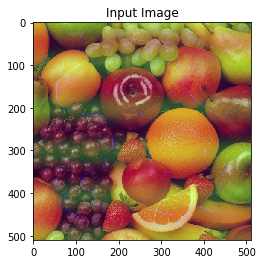

In [5]:
# We show the image
plt.imshow(Fruit_img/255)
plt.title('Input Image')
plt.show()

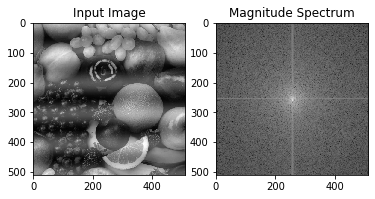

In [6]:
# We will plot every channel
plt.subplot(121),plt.imshow(G_slide, cmap = 'gray')
plt.title('Input Image')

DFT_G = np.fft.fft2(G_slide)
DFT_G = np.fft.fftshift(DFT_G)

plt.subplot(122),plt.imshow(20 * np.log(np.abs(DFT_G)), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


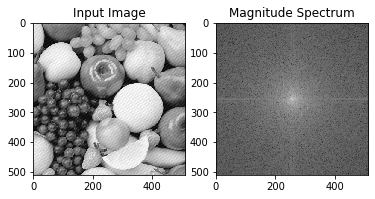

In [7]:
# We will plot every channel
plt.subplot(121),plt.imshow(R_slide, cmap = 'gray')
plt.title('Input Image')

DFT_R = np.fft.fft2(R_slide)
DFT_R = np.fft.fftshift(DFT_R)

plt.subplot(122),plt.imshow(20 * np.log(np.abs(DFT_R)), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


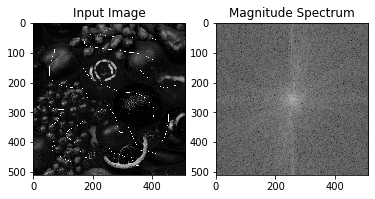

In [8]:
# We will plot every channel
plt.subplot(121),plt.imshow(B_slide, cmap = 'gray')
plt.title('Input Image')
DFT_B = np.fft.fft2(B_slide)
DFT_B = np.fft.fftshift(DFT_B)

plt.subplot(122),plt.imshow(20 * np.log(np.abs(DFT_B)), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


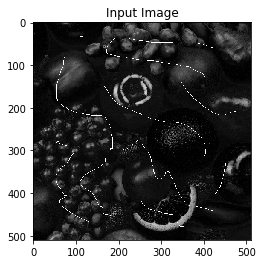

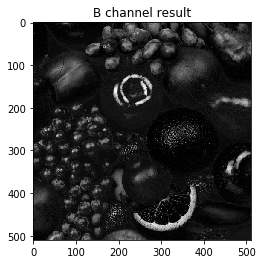

In [9]:
# This channel has e very simple noise so we can delete it with just cindition if the pixel value is greater than 200
plt.imshow(B_slide, cmap = 'gray')
plt.title('Input Image')
plt.show()
im_back_B = np.copy(B_slide)
im_back_B[B_slide > 200] = np.mean(im_back_B)
plt.imshow(im_back_B, cmap = 'gray')
plt.title('B channel result')
plt.show()

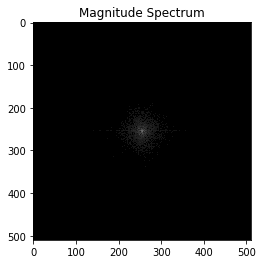

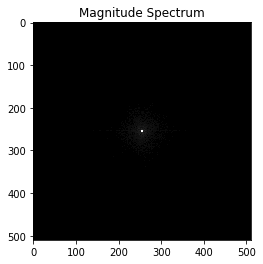

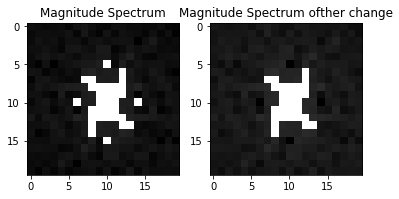

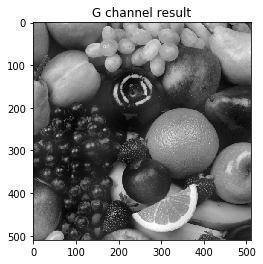

In [10]:
# This part we need to calculate the frequency domain pf the image and after that we 
color_filter = np.abs(DFT_G)
CUT_OFF = 10
FRAME_SIZE = 10
Temp = np.copy(color_filter)
Temp[np.log(color_filter) > CUT_OFF] = 5 * np.power(np.log(color_filter[np.log(color_filter) > CUT_OFF]), 5) 
plt.imshow(Temp, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

Temp[Temp > np.max(Temp) / 3] = 2 * np.max(Temp)
plt.imshow(Temp, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


sub_img = np.copy(Temp[int(Temp.shape[0]/2)-FRAME_SIZE:int(Temp.shape[0]/2) + FRAME_SIZE, int(Temp.shape[1]/2) - FRAME_SIZE:int(Temp.shape[1]/2) + FRAME_SIZE])

plt.subplot(121),plt.imshow(sub_img, cmap = 'gray')
plt.title('Magnitude Spectrum')

### making the new image
# We also need to determin where we want to git rid of the noises because there are 4 spot in the freq domain
y_center, x_center = int(Temp.shape[0] / 2), int(Temp.shape[1] / 2)

New_DFT_G = np.copy(DFT_G)
# assume those splots with very low vale
New_DFT_G[y_center + 5, x_center] = 0.0001
New_DFT_G[y_center - 5, x_center] = 0.0001
New_DFT_G[y_center, x_center + 4] = 0.0001
New_DFT_G[y_center, x_center - 4] = 0.0001
color_filter = np.abs(New_DFT_G)
Temp = np.copy(color_filter)
# And for the rest of the pixels we will magnify them to see them better
Temp[np.log(color_filter) > CUT_OFF] = 5 * np.power(np.log(color_filter[np.log(color_filter) > CUT_OFF]), 5) 
Temp[Temp > np.max(Temp) / 3] = 2 * np.max(Temp)

sub_img = np.copy(Temp[int(Temp.shape[0]/2)-FRAME_SIZE:int(Temp.shape[0]/2) + FRAME_SIZE, int(Temp.shape[1]/2) - FRAME_SIZE:int(Temp.shape[1]/2) + FRAME_SIZE])

# At the end we will plot the image

plt.subplot(122),plt.imshow(sub_img, cmap = 'gray')
plt.title('Magnitude Spectrum ofther change')
plt.show()


im_back_G = np.fft.ifftshift(New_DFT_G)
im_back_G = (np.abs(np.fft.ifft2(im_back_G))).round()
plt.imshow(im_back_G, cmap = 'gray')
plt.title('G channel result')
plt.show()

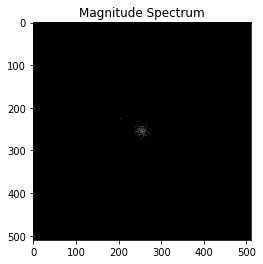

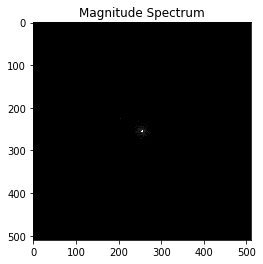

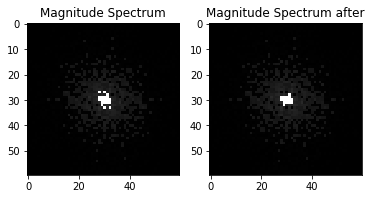

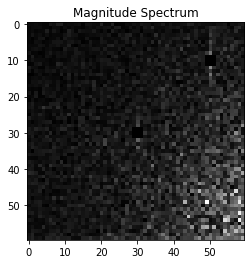

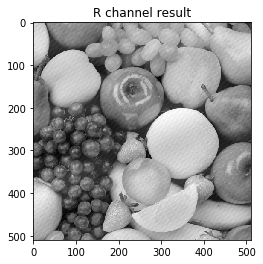

In [11]:
# This part we need to calculate the frequency domain pf the image and after that we 

color_filter = np.abs(DFT_R)
FRAME_SIZE = 30
CUT_OFF = 12
Temp = np.copy(color_filter)
Temp[np.log(color_filter) > CUT_OFF] = 5 * np.power(np.log(color_filter[np.log(color_filter) > CUT_OFF]), 5) 
plt.imshow(Temp, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

Temp[Temp > np.max(Temp) / 3] = 2 * np.max(Temp)
plt.imshow(Temp, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


sub_img = np.copy(Temp[int(Temp.shape[0]/2)-FRAME_SIZE:int(Temp.shape[0]/2) + FRAME_SIZE, int(Temp.shape[1]/2) - FRAME_SIZE:int(Temp.shape[1]/2) + FRAME_SIZE])

plt.subplot(121),plt.imshow(sub_img, cmap = 'gray')
plt.title('Magnitude Spectrum')


### making the new image
### making the new image
# We also need to determin where we want to git rid of the noises because there are 4 spot in the freq domain
y_center, x_center = int(Temp.shape[0] / 2), int(Temp.shape[1] / 2)

New_DFT_R = np.copy(DFT_R)
New_DFT_R[y_center + 3, x_center] = 0.0001
New_DFT_R[y_center - 3, x_center] = 0.0001
New_DFT_R[y_center + 3, x_center + 2] = 0.0001
New_DFT_R[y_center - 3, x_center - 2] = 0.0001



New_DFT_R[224:227, 204:207] = 0.001
New_DFT_R[204:207, 224:227] = 0.001


color_filter = np.abs(New_DFT_R)
Temp = np.copy(color_filter)
Temp[np.log(color_filter) > CUT_OFF] = 5 * np.power(np.log(color_filter[np.log(color_filter) > CUT_OFF]), 5) 
Temp[Temp > np.max(Temp) / 3] = 2 * np.max(Temp)

# And for the rest of the pixels we will magnify them to see them better
sub_img = np.copy(Temp[int(Temp.shape[0]/2)-FRAME_SIZE:int(Temp.shape[0]/2) + FRAME_SIZE, int(Temp.shape[1]/2) - FRAME_SIZE:int(Temp.shape[1]/2) + FRAME_SIZE])

plt.subplot(122),plt.imshow(sub_img, cmap = 'gray')
plt.title('Magnitude Spectrum after')
plt.show()



Temp[224:227, 204:207] = 0.001
Temp[204:207, 224:227] = 0.001
sub_img = np.copy(Temp[int(Temp.shape[0]/2 - 30 )-FRAME_SIZE:int(Temp.shape[0]/2 -30) + FRAME_SIZE, int(Temp.shape[1]/2 - 50) - FRAME_SIZE:int(Temp.shape[1]/2 - 50) + FRAME_SIZE])



# At the end we will plot the image
plt.imshow(sub_img, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


im_back_R = np.fft.ifftshift(New_DFT_R)
im_back_R = (np.abs(np.fft.ifft2(im_back_R))).round()
plt.imshow(im_back_R, cmap = 'gray')
plt.title('R channel result')
plt.show()

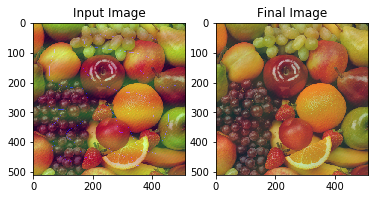

In [12]:
# In the very end we are going to combine the three images and make a new one
NEW_Fruit_img = cv2.imread(FRUIT_PATH, 1)
Fruit_img = Fruit_img.astype('f8')

NEW_Fruit_img[:,:,0] = im_back_R
NEW_Fruit_img[:,:,1] = im_back_G
NEW_Fruit_img[:,:,2] = im_back_B

plt.subplot(121),plt.imshow(Fruit_img/255)
plt.title('Input Image')

plt.subplot(122),plt.imshow(NEW_Fruit_img/255)
plt.title('Final Image')
plt.show()

R_slide = Fruit_img[:,:,0]
G_slide = Fruit_img[:,:,1]
B_slide = Fruit_img[:,:,2]